In [96]:
import pandas as pd
import matplotlib.pyplot as plt



In [97]:
#Read dataset
df = pd.read_csv('Datasets/housing.csv')

#print first few rows of dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
#Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


One column has type object

In [105]:
#Verify null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Only column *total_bedrooms* has null values

In [100]:
#Descriptive statistics of total_bedrooms column
df.total_bedrooms.describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [7]:
# Mean value
df.total_bedrooms.mean()

537.8705525375618

In [8]:
# Median value
df.total_bedrooms.median()

435.0

In [106]:
# Mode value
df.total_bedrooms.mode()

0    280.0
Name: total_bedrooms, dtype: float64

In [109]:
# Handle missing values: Fill the missing values with the mean of the respective column.
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace = True) 

In [110]:
# Dataset without null values
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [114]:
df.total_bedrooms.mean()

537.8705525375617

The difference between the first mean and new mean after clean null values in total_bedrooms column is very insignificant.

In [12]:
# Verify columns types 
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

Only *ocean_proximity* not is numeric

In [113]:
# Unique values in ocean_proximily
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [118]:
#Encode categorical data: Convert categorical column in the dataset to numerical data.
df['ocean_proximity'] = df['ocean_proximity'].astype('category').cat.codes
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [119]:
# New unique values in ocean_proximily
df['ocean_proximity'].unique()

array([3, 0, 1, 4, 2], dtype=int8)

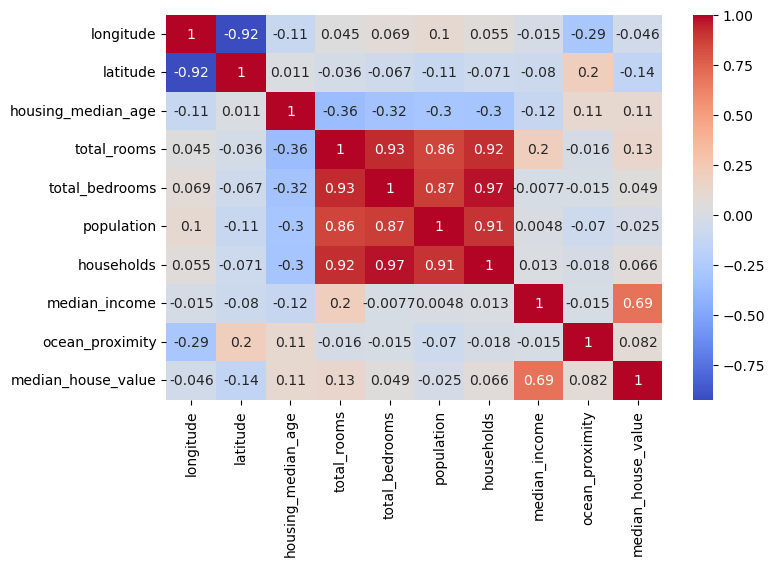

In [122]:
import seaborn as sns

plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

How we can observation, only *mean_income* has great corr with *media_house_value*, but in this project I'll used almost all columns, removing only *longitude* and *latitude*,following the instructions of the author. In future project I make some adjust for improvement.

# Check Outliers values

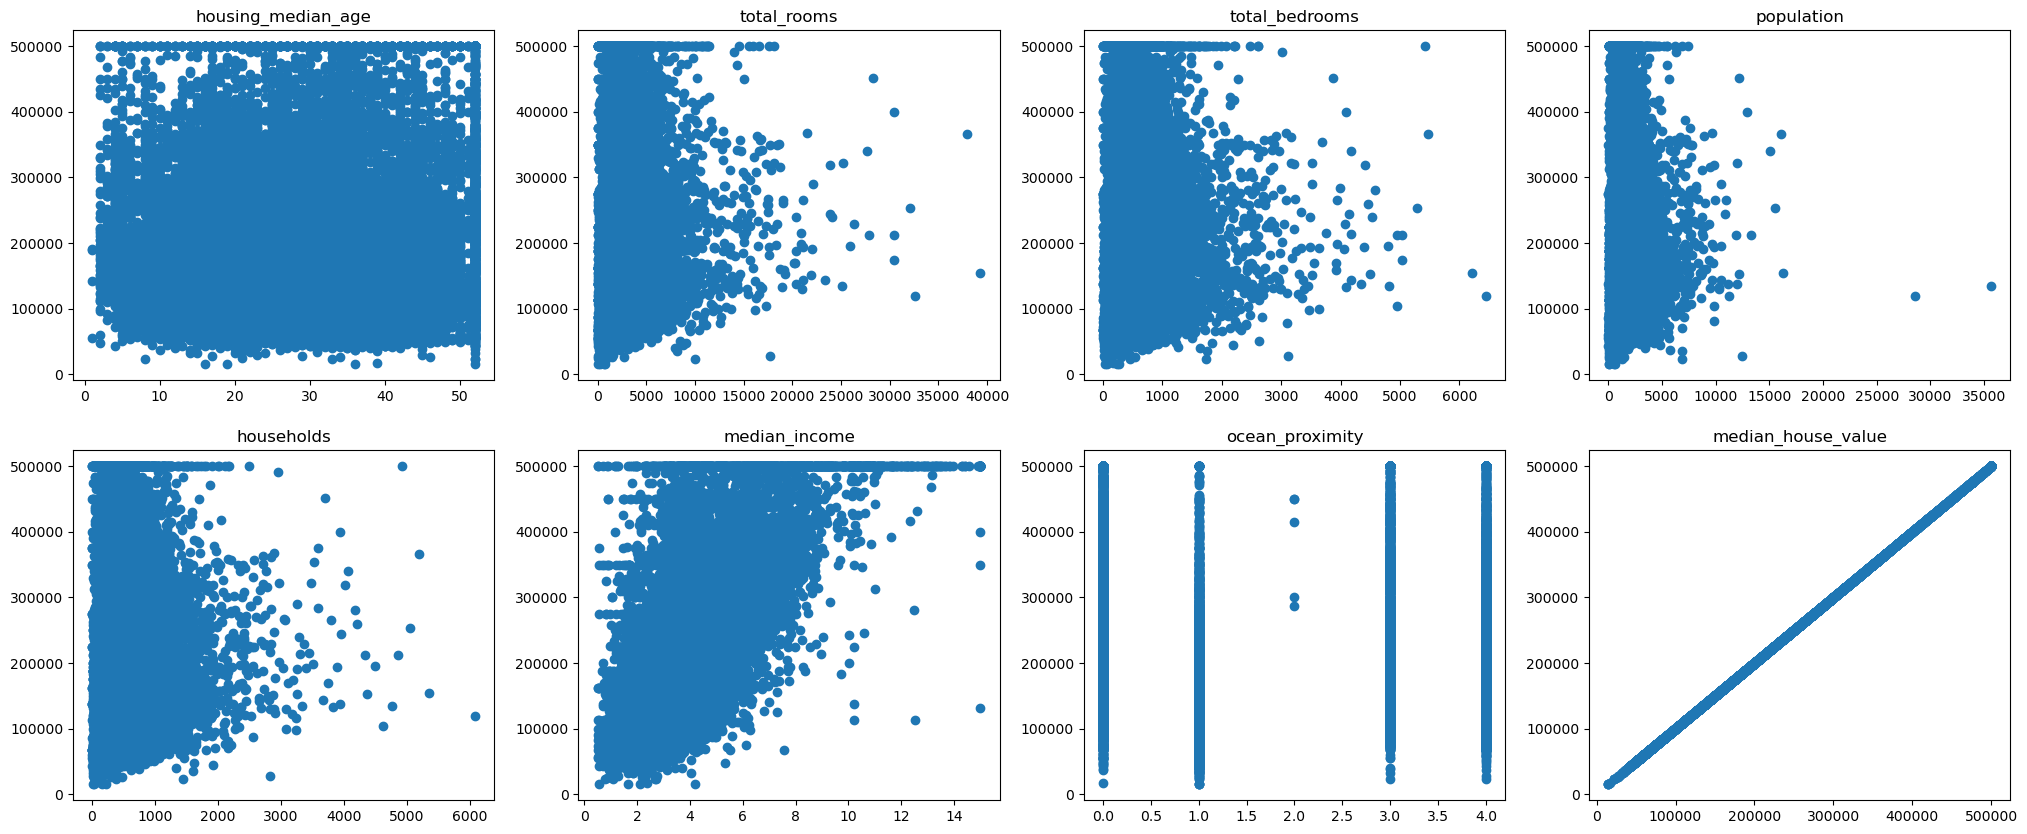

In [154]:
# See data distribuition for each columns
data = df.iloc[:,2:]   # Drop latitude and longitude

# Create a scatter plot for each column
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(25, 10))
axs = axs.flatten()
for i, col in enumerate(data.columns):
    axs[i].scatter(data[col], data['median_house_value'])
    axs[i].set_title(col);

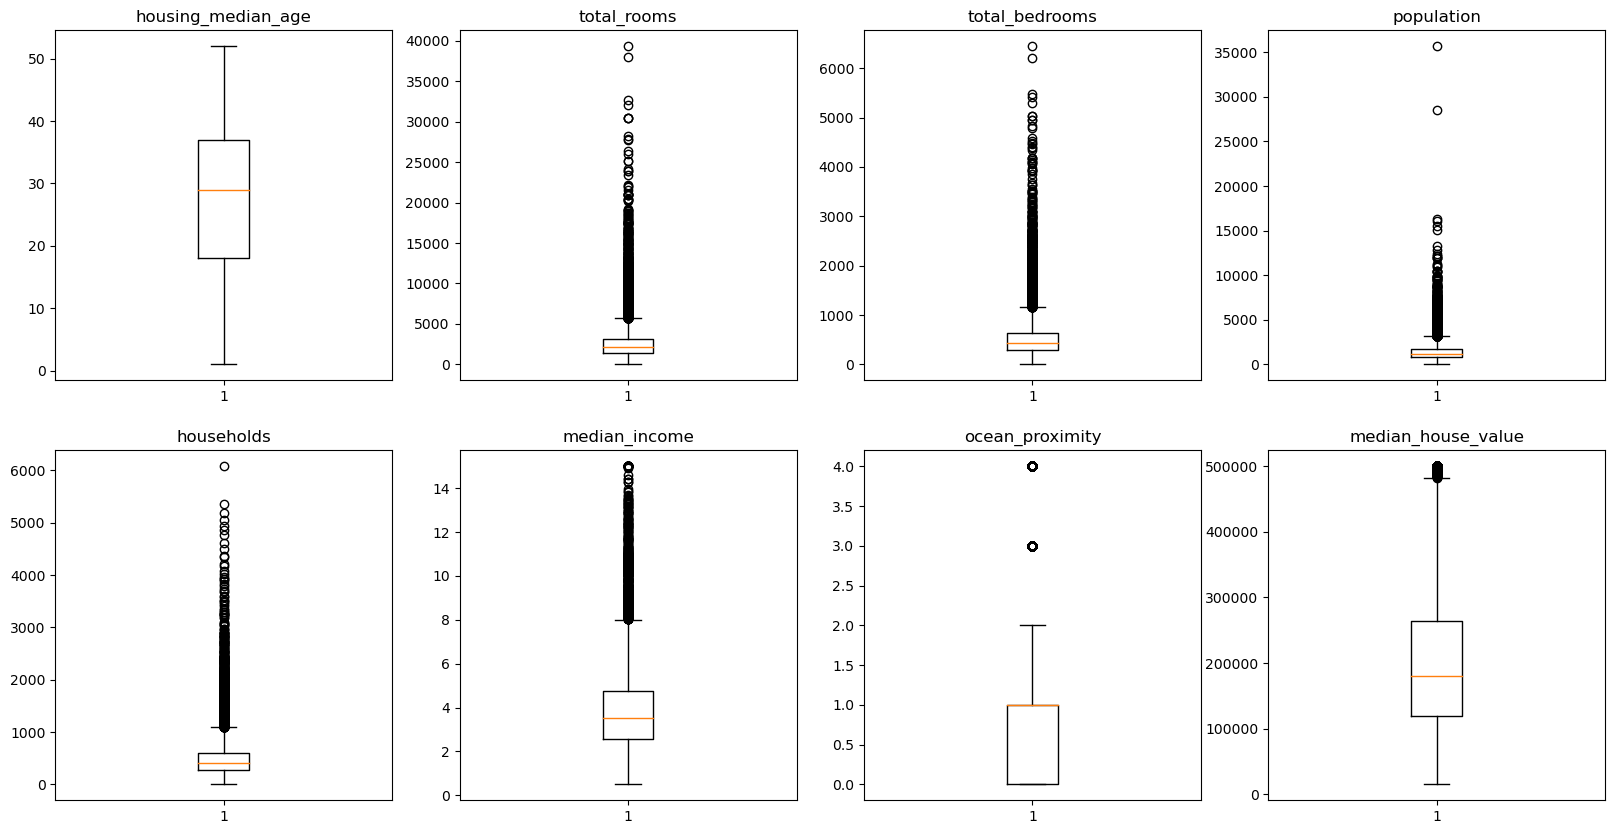

In [207]:
# Create a box plot for each feature
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
axs = axs.flatten()
for i, col in enumerate(data.columns):
    axs[i].boxplot(data[col])
    axs[i].set_title(col)

plt.show()

In [205]:
# Select the columns to calculate IQR for
cols = list(data.columns)

# Calculate the IQR for each column
iqr_df = pd.DataFrame(columns=['Column Name','Q1','Q3', 'Std',  'IQR'])
for col in cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    std_ = data[col].std()
    iqr = q3 - q1
    iqr_df.loc[len(iqr_df)] = [col, q1, q3, std_,iqr]

# Print the results
print(iqr_df.to_string(index=False))

       Column Name          Q1           Q3           Std          IQR
housing_median_age     18.0000     37.00000     12.585558     19.00000
       total_rooms   1447.7500   3148.00000   2181.615252   1700.25000
    total_bedrooms    297.0000    643.25000    419.266592    346.25000
        population    787.0000   1725.00000   1132.462122    938.00000
        households    280.0000    605.00000    382.329753    325.00000
     median_income      2.5634      4.74325      1.899822      2.17985
   ocean_proximity      0.0000      1.00000      1.420662      1.00000
median_house_value 119600.0000 264725.00000 115395.615874 145125.00000


How can observation, dataset has some outliers values, this can be a future problem, but we going to see how the data behave.

# Split the dataset

In [144]:
#Split the dataset: Split the data into 80% training dataset and 20% test dataset.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:,2:-1]                    # Select Features
y = df['median_house_value'].copy()   # Select independent variable

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 40 )

# Standardize data 

In [210]:
#Standardize data: Standardize training and test datasets.
# It's used to standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


**Information:** The StandardScaler is sensitive to outliers, and the features may scale differently from each other in the presence of outliers, it means that the presence of outliers in the data can have a significant impact on the scaling of the features. Outliers are data points that are significantly different from other data points in the dataset.

# Perform Linear Regression

In [211]:
#Perform Linear Regression: Perform Linear Regression on training data. Predict output for test dataset using the fitted model. 
from sklearn.linear_model import LinearRegression

# Creat Instance
lr = LinearRegression()

# Fit method
lr.fit(X_train_std, y_train)


LinearRegression()

In [220]:
print(lr.coef_)
lr.intercept_

[ 22498.74819543 -42667.67623478  33716.64096514 -37593.00972618
  53553.60182136  89948.6926273    6607.86932346]


206139.59823158916

In [217]:
# Make prediction on new data.
y_pred = lr.predict(X_test_std)

In [215]:
#Print root mean squared error (RMSE) an R² Score from Linear Regression 
from sklearn.metrics import mean_squared_error, r2_score

# Using functions
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print error method 
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Root Mean Squared Error: 76789.21
R² Score: 0.57


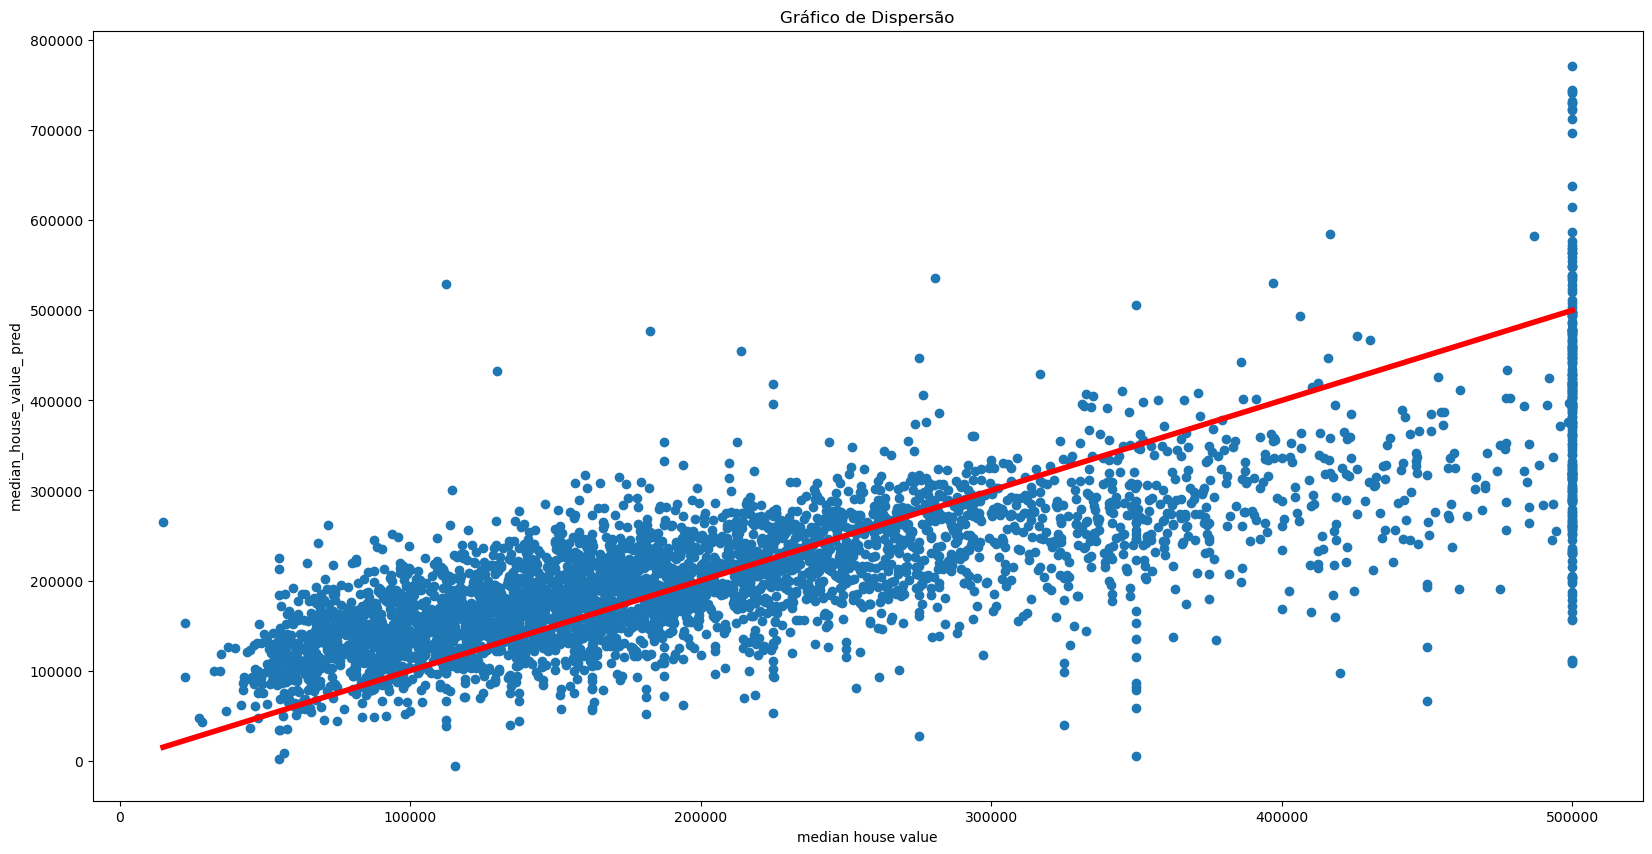

In [219]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=4, color = 'red')
plt.title('Gráfico de Dispersão')
plt.xlabel('median house value')
plt.ylabel('median_house_value_ pred')
plt.show()


In [69]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train_std, y_train)


DecisionTreeRegressor(random_state=0)

In [70]:
y_pred = dtr.predict(X_test_std)

In [71]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


Root Mean Squared Error: 69199.89
R2 Score: 0.65


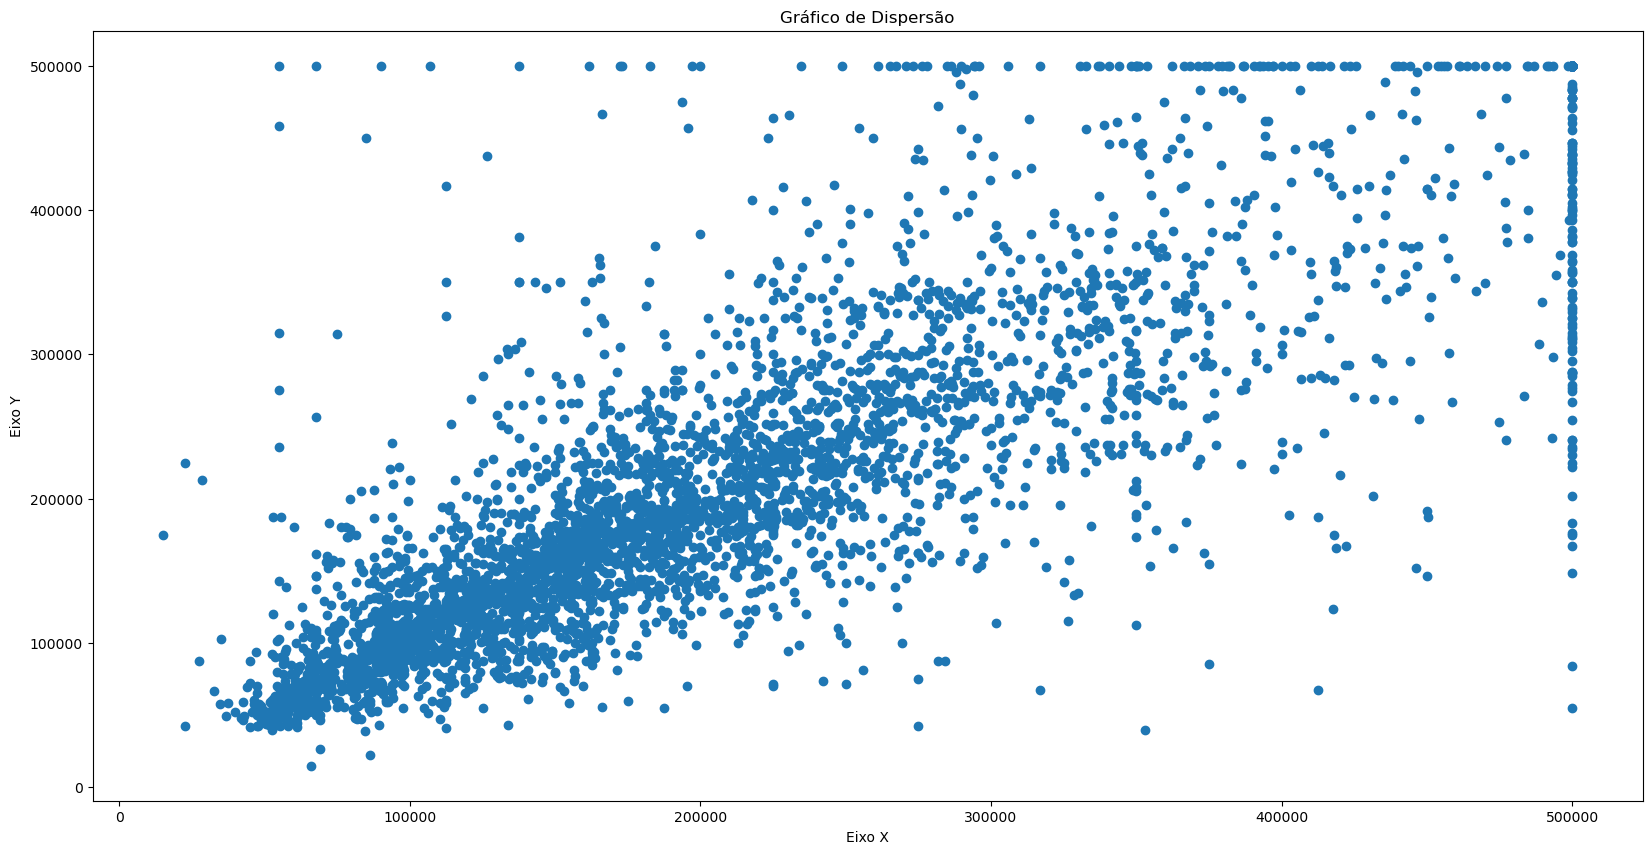

In [72]:
plt.figure(figsize = (20,10))
plt.scatter(y_test, y_pred)
plt.title('Gráfico de Dispersão')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y');

In [73]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train_std, y_train)


RandomForestRegressor(random_state=0)

In [74]:
y_pred = rfr.predict(X_test_std)

In [77]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R2: {r2:.4f}")


Root Mean Squared Error: 51040.5355
R2: 0.8113


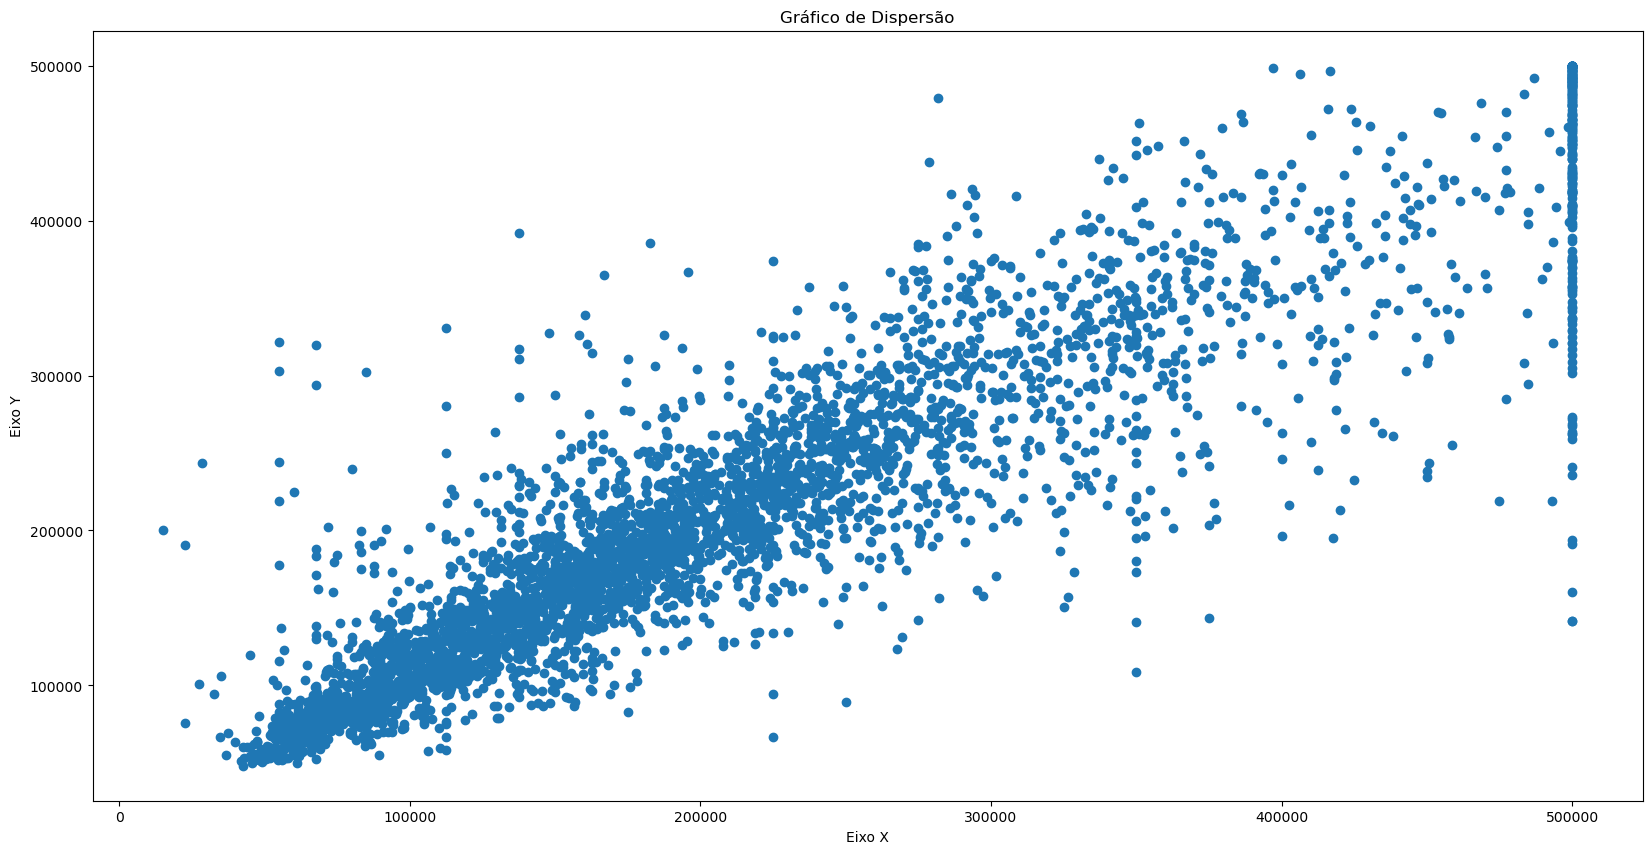

In [78]:
plt.figure(figsize = (20,10))
plt.scatter(y_test, y_pred)
plt.title('Gráfico de Dispersão')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y');

In [95]:

X_train_mi = X_train['median_income'].values.reshape(-1, 1)
X_test_mi = X_test['median_income'].values.reshape(-1, 1)


from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_mi, y_train)


y_pred = lr.predict(X_test_mi)


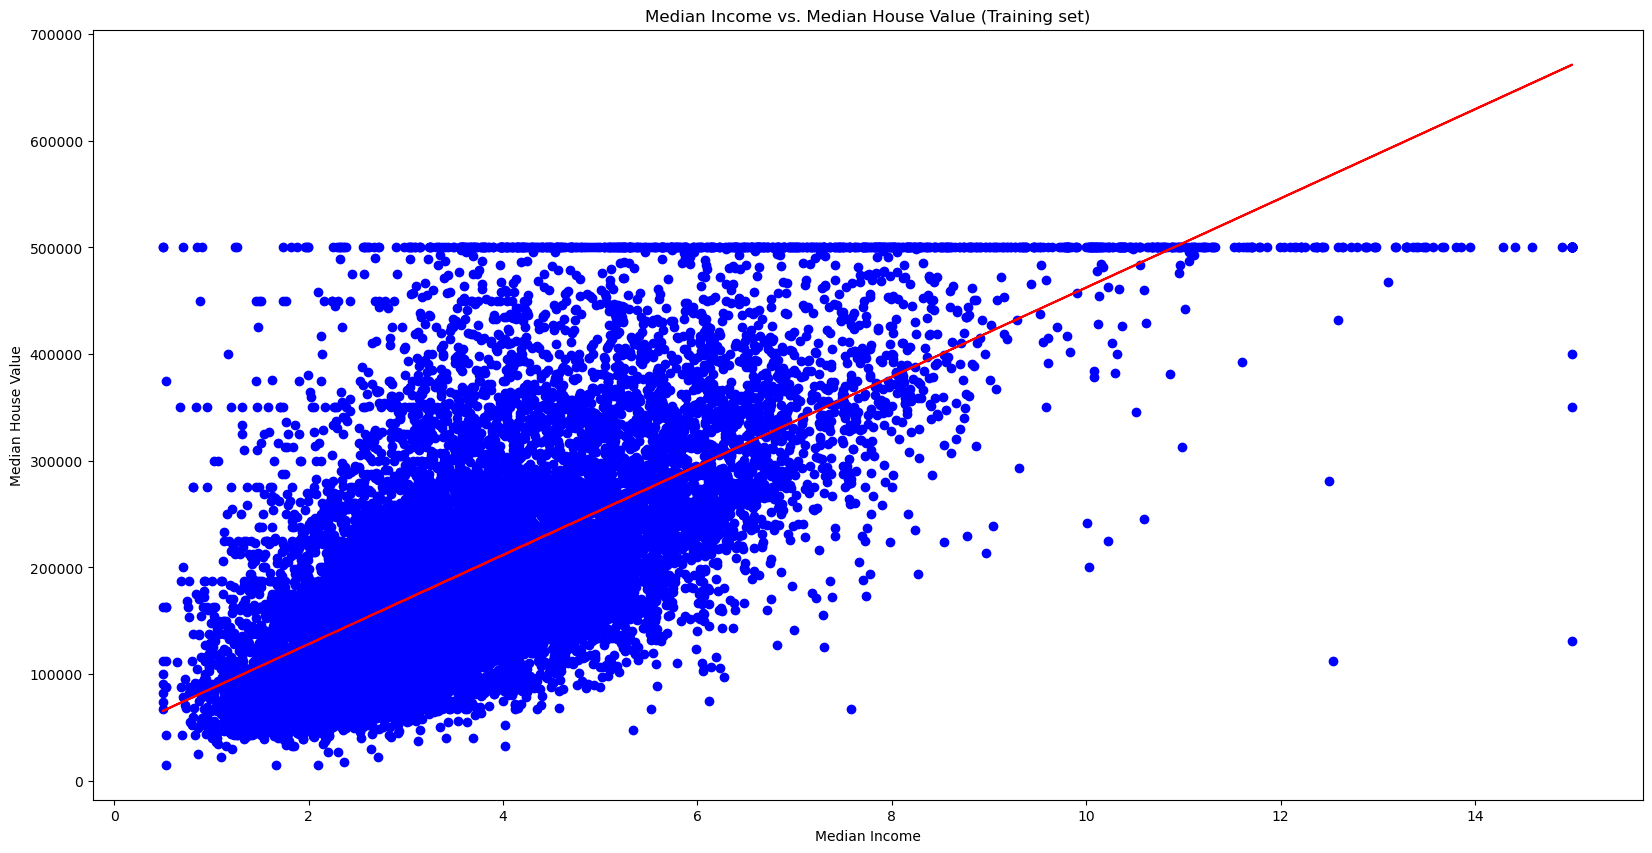

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.scatter(X_train_mi, y_train, color='blue')
plt.plot(X_train_mi, lr.predict(X_train_mi), color='red')
plt.title('Median Income vs. Median House Value (Training set)')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()



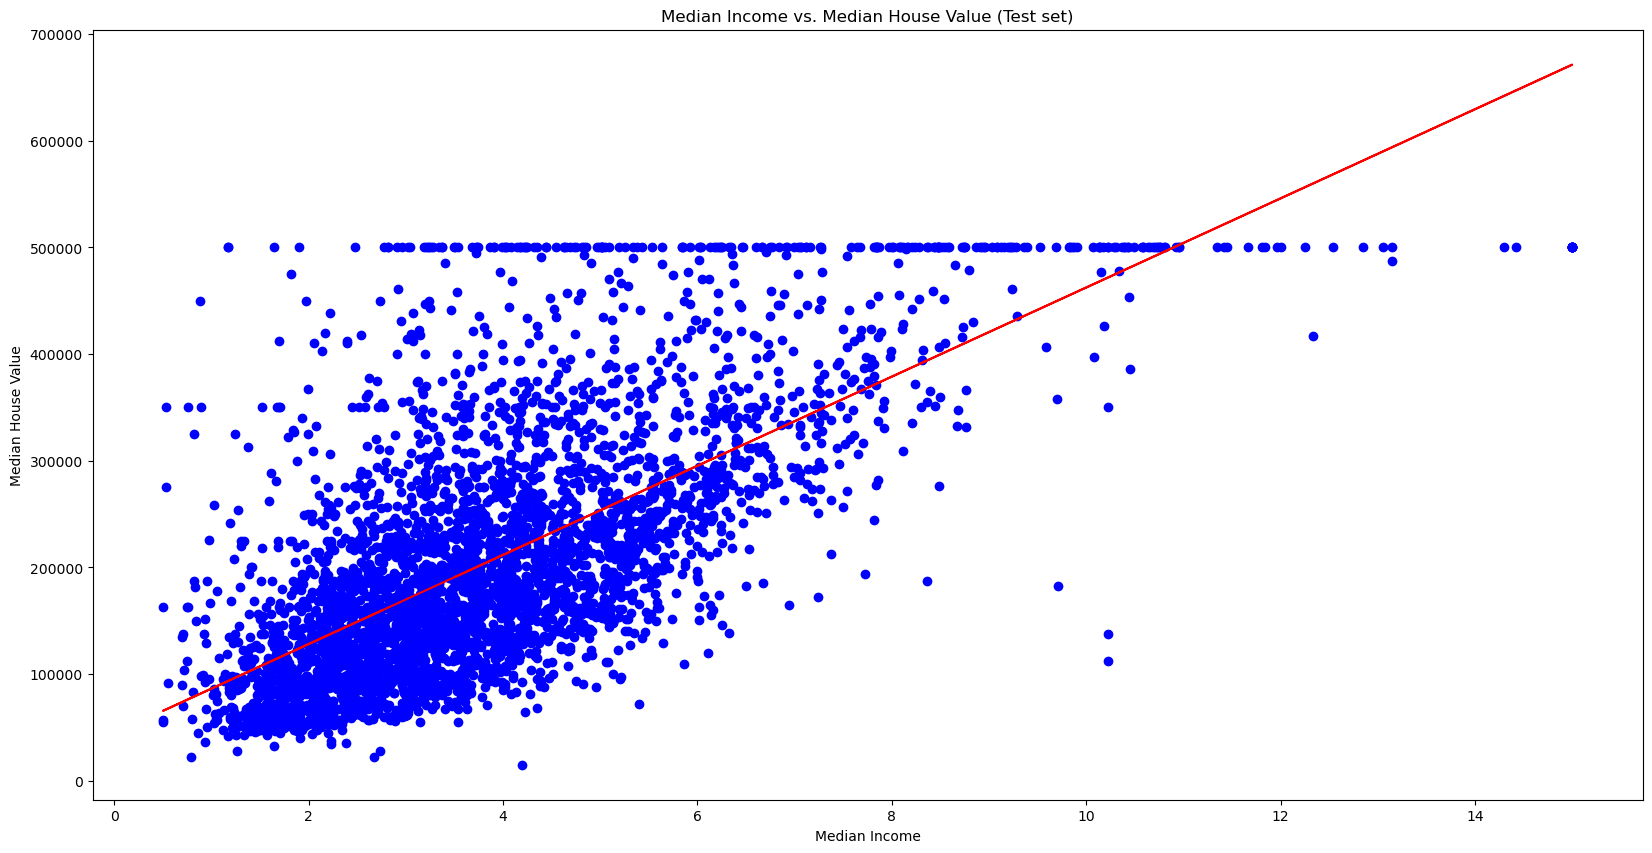

In [90]:
plt.figure(figsize = (20,10))
plt.scatter(X_test_mi, y_test, color='blue')
plt.plot(X_test_mi, lr.predict(X_test_mi), color='red')
plt.title('Median Income vs. Median House Value (Test set)')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()